# 準備

In [36]:
import pandas as pd
import re

years = [2022, 2021, 2020, 2019, 2018, 2017]
nlp = {year: pd.read_csv(f'./csv/nlp/{year}.csv').query("track=='Main'") for year in years}
nlp_session = {year: pd.read_csv(f'./csv/nlp/{year}_session.csv') for year in years}
xai = {year: pd.read_csv(f'./csv/xai/{year}.csv').query("track=='Main'") for year in years[:2]}
# xai_session = {year: pd.read_csv(f'./csv/xai/{year}_session.csv') for year in years[:2]}
planning = {year: pd.read_csv(f'./csv/planning/{year}.csv').query("track=='Main'") for year in years}

for year in years:
    nlp[year].loc[:, 'categories'] = nlp[year].loc[:, 'categories'].apply(lambda x: re.sub(r'[\[\]\']', '', x).split(', '))
    nlp_session[year].loc[:, 'categories'] = nlp_session[year].loc[:, 'categories'].apply(lambda x: re.sub(r'[\[\]\']', '', x).split(', '))
    planning[year].loc[:, 'categories'] = planning[year].loc[:, 'categories'].apply(lambda x: re.sub(r'[\[\]\']', '', x).split(', '))
    
for year in years[:2]:
    xai[year].loc[:, 'categories'] = xai[year].loc[:, 'categories'].apply(lambda x: re.sub(r'[\[\]\']', '', x).split(', '))
    # xai_session[year].loc[:, 'categories'] = xai_session[year].loc[:, 'categories'].apply(lambda x: re.sub(r'[\[\]\']', '', x).split(', '))

NLPはカテゴリーが多いので、大カテゴリを作成。

In [2]:
cat = {
    'Sequence Labeling':
    [
        'Tagging', 
        'Named Entities', 
        'Coreference Resolution',
        'Chunking',
        'Parsing', 
    ],

    'Natural Language Generation':
    [
        'Dialogue', 
        'Question Answering', 
        'Summarization', 
        'Natural Language Summarization'
        'Machine Translation', 
    ],
    

    'Linguistics':
    [    
        'Natural Language Semantics',
        'Resources and Evaluation', 
        'Language Grounding',
        'Psycholinguistics', 
        'Phonology', 
        'Morphology', 
        'Discourse', 
        'syntax'
    ]
}

In [38]:
main_categories = {
    'General': [ # 除くかも, 
        'General', # 統一＋どういうやつ？
        'general'
    ],
    'Natural Language Processing':
    [
        'Natural Language Processing', #del 一応見る。
    ],
    
    'Embeddings': ['Embeddings'],
    
    'Language Models': ['Language Models'],

    'Text Classification': 
    [
        'Text Classification',
        'Sentiment Analysis and Text Mining', 
    ],
    
    'Information Retrieval':
    [
        'Information Retrieval and Text Mining', 
        'Information Extraction', 
        'Knowledge Extraction', 
    ],
    
    'Informatin Retrieval':
    [        
        'Information Retrieval', 
    ],
        
    'Sequence Labeling':
    [
        'Tagging', 
        'Named Entities', 
        'Coreference Resolution',
        'Chunking',
        'and Parsing', 
        'chunking', 
        'and parsing', 
    ],

    'Natural Language Generation':
    [
        'Language Generation', 
        'Natural Language Generation', 
        'Dialogue', 
        'Dialogue and Interactive Systems',  
        'Question Answering', 
        'Summarization', 
        'Natural Language Summarization'
        'Machine Translation', 
        'Machine Translation and Multilinguality', 
    ],
    'Dialogue':
    [
    ],
    
    'Question Answering':
    [
    ],
    'Summarization':
    [        
    ],
    'Machine Translation':
    [
    ],
    
    'Applications and Tools': 
    [        
        'Applications', 
        'NLP Applications and Tools', 
        'Tools',
    ],
    
    'Interpretability and Analysis of Models':
    [
        'Interpretability and Analysis of Models for NLP'
    ],
    
    'Segmentations':
    [        
        'and word segmentation',
        'and Word Segmentation', 
    ],
    'Linguistics':
    [    
        'Natural Language Semantics',
        'Resources and Evaluation', 
        'Language Grounding',
        'Psycholinguistics', 
        'Phonology', 
        'Morphology', 
        'Discourse', 
        'syntax'
    ],
    'Speech': ['Speech'],

    'Other': [
        'Other',
    ],
}

scat2mcat = {}
for mcat, scat in main_categories.items():
    for _scat in scat:
        scat2mcat[_scat] = mcat
import copy

def mcat(dfs):
    dfs = copy.deepcopy(dfs)
    for year in years:
        dfs[year].loc[:, 'categories'] = dfs[year].loc[:, 'categories'].apply(lambda x: list(set(map(lambda y: scat2mcat.get(y), x))))
    return dfs

nlp_mcat = mcat(nlp)
nlp_session_mcat = mcat(nlp_session)

In [43]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from numpy import absolute
import copy
import seaborn as sns

def category_count(df):
    df = copy.deepcopy(df)
    categories = {}
    for year, _df in df.items():
        #_categories = df.loc[:, 'categories'].apply(lambda x: scat2mcat.get(x[0]))
        _categories = sum(_df.loc[:,'categories'].tolist(), [])
        categories.setdefault(year, []).extend(_categories)
        categories[year] = Counter(categories[year])
    return categories
    

def autopct(pct, allvals):
    #absolute = int(pct/100.*sum(allvals))
    return f'{pct:.0f}%'#\n({absolute:d})'

def pie_plot(df, year=2022, explode=None, figsize=(6,6)):
    categories = category_count(df)
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(aspect="equal"))
    print(year)
    data=[float(v) for k, v in categories[year].most_common()]
    labels=[f'{k} ({v})' for k, v in categories[year].most_common()]
    palette_color = sns.color_palette('Paired')#('RdYlBu')
    wedges, texts, autotexts = ax.pie(
                                    data, 
                                    labels=labels, 
                                    autopct=lambda pct: autopct(pct, data),
                                    textprops=dict(color="black", fontsize=14),
                                    colors=palette_color,
                                    explode=explode,
    )
    plt.show()

In [40]:
# カテゴリ一覧
print(set(sum(nlp_mcat[2022].loc[:, 'categories'].to_list(), [])))
print(set(sum(xai[2022].loc[:, 'categories'].to_list(), [])))
print(set(sum(planning[2022].loc[:, 'categories'].to_list(), [])))

{'Language Models', 'Text Classification', 'Natural Language Generation', 'Speech', 'Other', 'Sequence Labeling', 'Interpretability and Analysis of Models', 'Linguistics', 'Embeddings', 'Applications and Tools', 'Information Retrieval'}
{'Explainability and Interpretability', 'Ethical', 'Bias', 'Societal Impact of AI', 'Safety & Robustness', 'Trustworthy AI', 'AI and Law', 'Governance', 'Fairness & Diversity', 'Regulation', 'Legal and Societal Issues'}
{'Robot Planning', 'Real-time Planning', 'Scheduling', 'Mixed Discrete/Continuous Planning', 'Markov Decisions Processes', 'Planning under Uncertainty', 'Search in Planning and Scheduling', 'Applications', 'Planning with Incomplete Information', 'Learning in Planning and Scheduling', 'POMDPs', 'Hierarchical Planning', 'Distributed; Multi-agent Planning', 'Planning Algorithms', 'Activity and Plan Recognition', 'Theoretical Foundations of Planning'}


# 分析

## 論文数

Main Track  
2022,679  
2021,587  
2020,592  
2019,850  
2018,710  
2017,560

<img src='Main Track 論文数.png' width="650" height="500">


In [53]:
def paper_num(dfs):
    for year in years:
        try:
            print(f'{year},{len(dfs[year])}')
        except KeyError:
            break

print("NLP")
paper_num(nlp)
print("NLP")
paper_num(nlp_session)
print("AI Ethics, Trust, Fairness")
paper_num(xai)
print("Planning and Scheduling")
paper_num(planning)

NLP
2022,94
2021,53
2020,97
2019,105
2018,104
2017,89
NLP
2022,73
2021,34
2020,68
2019,85
2018,95
2017,43
AI Ethics, Trust, Fairness
2022,48
2021,29
Planning and Scheduling
2022,37
2021,37
2020,34
2019,53
2018,43
2017,58


In [98]:
print(f"2022,{len(xai[2022][xai[2022].loc[:, 'categories'].apply(lambda x: 'Explainability and Interpretability' in x)])}")
print(f"2021,{len(xai[2021][xai[2021].loc[:, 'categories'].apply(lambda x: 'Explainability' in x)])}")

2022,14
2021,8


## 円グラフ

### NLP

2022


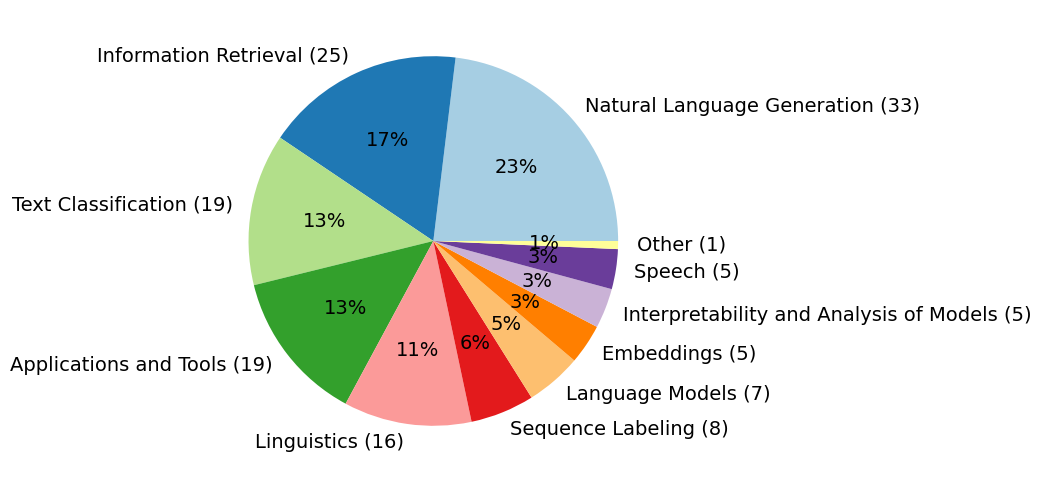

In [30]:
pie_plot(nlp_session_mcat, 2022)

### XAI

2021


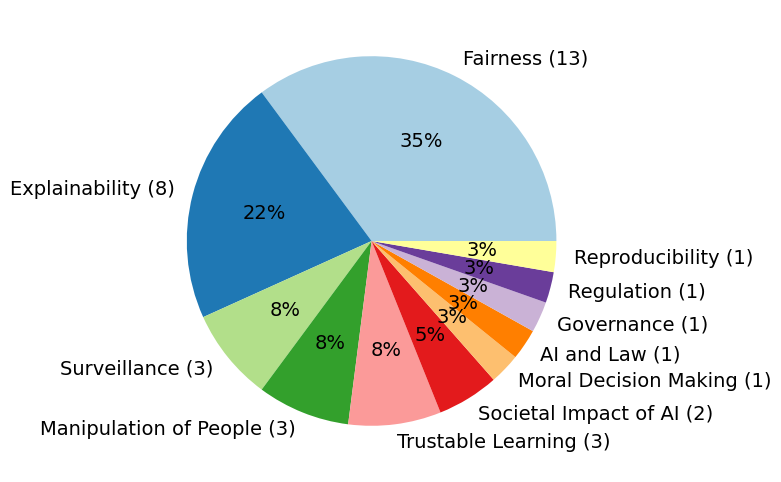

In [42]:
pie_plot(xai, year=2021)

2022


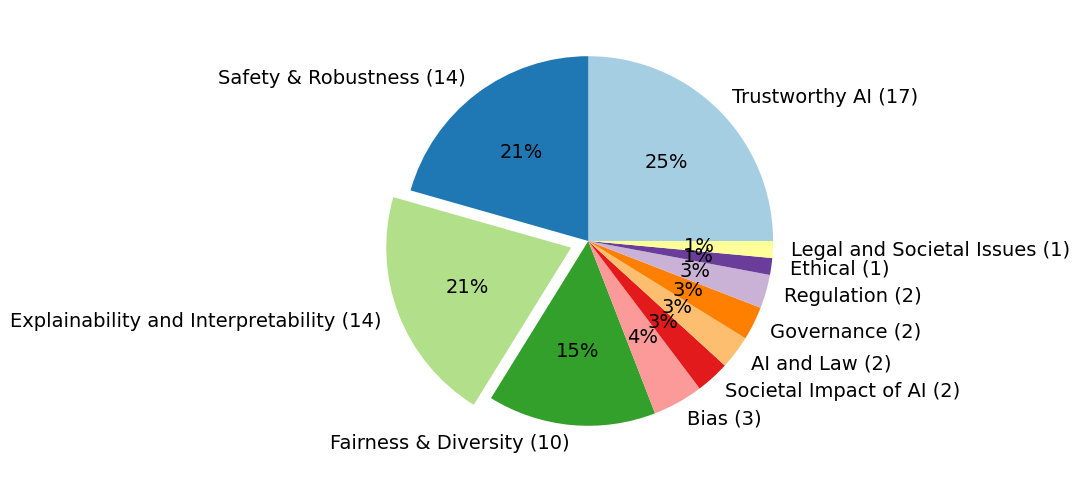

In [95]:
explode = [0 for _ in range(len(set(sum(xai[2022].loc[:,'categories'].to_list(), []))))]
explode[2] = 0.1
pie_plot(xai, year=2022, explode=explode)

### Planning

2022


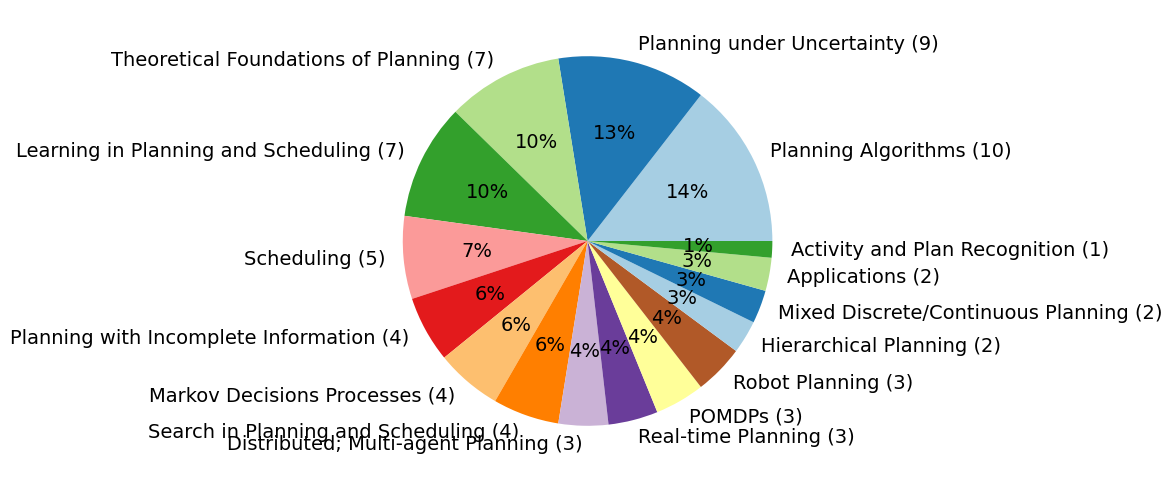

In [60]:
pie_plot(planning, year=2022)

カテゴリについて

In [198]:
import re
from collections import Counter
categories = {}
print('異なりカテゴリ数:')
for year, df in nlp_session.items():
    _categories = sum(df.loc[:, 'categories'], [])
    categories.setdefault(year, []).extend(_categories)
    categories[year] = Counter(categories[year])
    print(f'{year}: {len(categories[year])}')
whole = Counter([])
for c in categories.values():
    whole = whole + c
print(f'whole: {len(whole)}')

異なりカテゴリ数:
2022: 25
2021: 20
2020: 23
2019: 25
2018: 25
2017: 21
whole: 39


Applicationのやつ

In [ ]:
year,main,nlp
2022,862,73
2021,723,34
2020,779,68
2019,964,85
2018,870,95
2017,781,43

In [8]:
for year, df in nlp_session.items():
    print(f'{year},{len(df)}')

2022,73
2021,34
2020,68
2019,85
2018,95
2017,43


In [571]:
nlp_session_mcat_unif[2022].query('categories.str.len() >= 2')

,Unnamed: 0,title,track,categories,url,desc
0,0,Aspect-based Sentiment Analysis with Opinion T...,Main,"[Text Classification, Information Retrieval]",https://www.ijcai.org/proceedings/2022/561,Existing studies usually extract these sentime...
2,2,Learning Meta Word Embeddings by Unsupervised ...,Main,"[Linguistics, Embeddings]",https://www.ijcai.org/proceedings/2022/563,Given multiple source word embeddings learnt u...
7,7,Interpretable AMR-Based Question Decomposition...,Main,"[Interpreterbility, Natural Language Generation]",https://www.ijcai.org/proceedings/2022/568,Effective multi-hop question answering (QA) re...
9,9,Global Inference with Explicit Syntactic and D...,Main,"[Sequence Labeling, Information Retrieval, Nat...",https://www.ijcai.org/proceedings/2022/570,Recent research attention for relation extract...
10,10,Conversational Semantic Role Labeling with Pre...,Main,"[Sequence Labeling, Information Retrieval, Nat...",https://www.ijcai.org/proceedings/2022/571,Conversational semantic role labeling (CSRL) i...
11,11,Inheriting the Wisdom of Predecessors: A Multi...,Main,"[Text Classification, Information Retrieval]",https://www.ijcai.org/proceedings/2022/572,"So far, aspect-based sentiment analysis (ABSA)..."
12,12,Logically Consistent Adversarial Attacks for S...,Main,"[Language Models, Text Classification, Natural...",https://www.ijcai.org/proceedings/2022/573,Recent efforts within the AI community have yi...
13,13,Leveraging the Wikipedia Graph for Evaluating ...,Main,"[Linguistics, Embeddings]",https://www.ijcai.org/proceedings/2022/574,Deep learning models for different NLP tasks o...
14,14,Fallacious Argument Classification in Politica...,Main,"[Linguistics, Text Classification]",https://www.ijcai.org/proceedings/2022/575,Fallacies play a prominent role in argumentati...
16,16,FastDiff: A Fast Conditional Diffusion Model f...,Main,"[Speech, Natural Language Generation]",https://www.ijcai.org/proceedings/2022/577,Denoising diffusion probabilistic models (DDPM...


2022


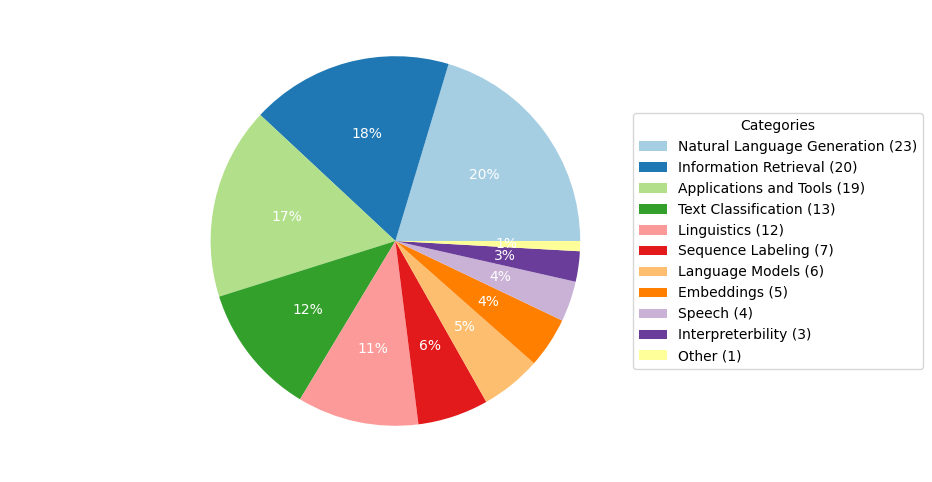

2022


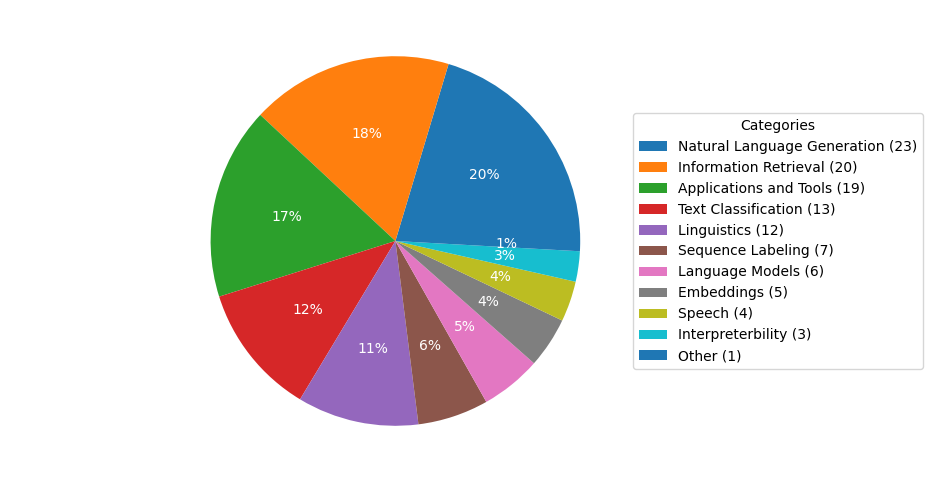

In [568]:
pie_plot(nlp_session_mcat_unif)

# wordcloud

In [63]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['In', 'We', 'A', 'via', 'Our', 'To', 'The', 'show', 'two', 'propose', 'models', 'However', 'However,', 'results', 'paper,', 'task', '', 'first', 'methods'])


for year in years:
    text = ' '.join(nlp_session[year].loc[:, 'desc'].to_list())

    def f(w):
        if w in stop_words:
            return False
        else:
            return True
    print(year)
    c = Counter(filter(f, text.split(' '))).most_common(10)
    for i, (k, v) in enumerate(c):
        print(f'{i+1}.{k}:{v}')
        
        
    from wordcloud import WordCloud

    # 画像作成
    wordcloud = WordCloud(max_font_size=120, background_color="white", colormap="summer", collocations=False, stopwords=stop_words, width=800, height=400).generate(text)
    # 画像保存
    wordcloud.to_file(f"result{year}.jpeg")

[nltk_data] Downloading package stopwords to /Users/haoki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2022
1.model:80
2.knowledge:42
3.information:39
4.language:39
5.data:38
6.novel:35
7.training:35
8.performance:30
9.method:30
10.state-of-the-art:28
2021
1.model:28
2.training:23
3.knowledge:23
4.novel:18
5.approach:17
6.performance:17
7.proposed:17
8.datasets:16
9.state-of-the-art:16
10.language:16
2020
1.model:95
2.data:41
3.training:36
4.novel:33
5.state-of-the-art:32
6.generation:32
7.knowledge:32
8.previous:28
9.proposed:27
10.method:27
2019
1.model:94
2.information:56
3.neural:52
4.proposed:50
5.state-of-the-art:47
6.learning:43
7.approach:43
8.sentiment:37
9.based:36
10.semantic:36
2018
1.model:100
2.learning:64
3.attention:59
4.proposed:52
5.neural:51
6.language:47
7.text:45
8.state-of-the-art:43
9.information:42
10.word:41
2017
1.model:55
2.proposed:30
3.neural:28
4.sentence:25
5.word:24
6.language:22
7.approach:21
8.semantic:19
9.data:17
10.attention:17
